In [1]:
import torch
import networkx as nx
from torch.utils.data import Dataset, DataLoader
import numpy as np 
from sklearn.metrics import r2_score 
import time 
from matplotlib import pyplot as plt 
import copy
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelBinarizer
import sys 
sys.path.append('../')

from src.models.GSNN import GSNN
from src.data.LincsDataset import LincsDataset
from src.models import utils 

%load_ext autoreload
%autoreload 2

In [2]:

# edge id :                 0  1  2  3  4
edge_index = torch.tensor([[0, 1, 1, 3, 2],
                           [1, 2, 3, 2, 4]])

function_nodes = np.array([1,2,3])

In [3]:
channels = utils._degree_to_channels(edge_index, min_size=2, max_size=3)
channels

array([0, 3, 3, 2, 0])

In [10]:
w1_indices, channels = utils.get_W1_indices(edge_index, 4, function_nodes, scale_by_degree=True)
w1_indices

tensor([[ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,
          3.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,  4.,  5.,  6.,
          7.]])

In [11]:
w2_indices = utils.get_W2_indices(function_nodes, channels)
w2_indices

tensor([[ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  3.,
          3.,  3.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,
          7.,  7.,  7.,  7.,  8.,  8.,  8.,  9.,  9.,  9., 10., 10., 10.],
        [ 0.,  1.,  2.,  3.,  0.,  1.,  2.,  3.,  0.,  1.,  2.,  3.,  0.,  1.,
          2.,  3.,  4.,  5.,  6.,  7.,  4.,  5.,  6.,  7.,  4.,  5.,  6.,  7.,
          4.,  5.,  6.,  7.,  8.,  9., 10.,  8.,  9., 10.,  8.,  9., 10.]])

In [12]:
w3_indices = utils.get_W3_indices(edge_index, function_nodes, channels)
w3_indices

tensor([[ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.,  4.,  5.,  6.,  7.,  8.,  9.,
         10.],
        [ 1.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  4.,  4.,  4.,  4.,  3.,  3.,
          3.]])

In [13]:
a = np.array([0,1,2,3])
a[3:3] = -1
a 

array([0, 1, 2, 3])

In [14]:
G2 = nx.DiGraph()

for src,dst in w1_indices.detach().cpu().numpy().T: 
    G2.add_edge(f'in-edge-{src}', f'layer1-{dst}')

for src,dst in w2_indices.detach().cpu().numpy().T: 
    G2.add_edge(f'layer1-{src}', f'layer2-{dst}')

for src,dst in w3_indices.detach().cpu().numpy().T: 
    G2.add_edge(f'layer2-{src}', f'out-edge-{dst}')

print(len(G2.edges()))

71


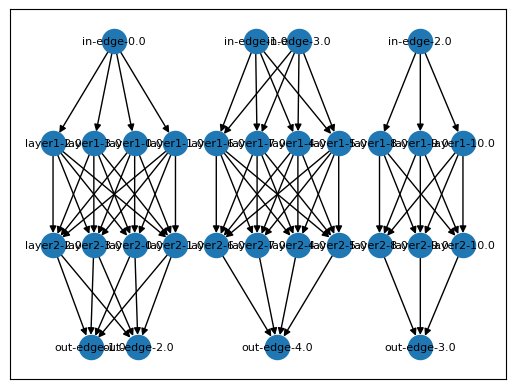

In [15]:
pos = nx.drawing.nx_agraph.graphviz_layout(G2, prog='dot')

nx.draw_networkx(G2, pos, font_size=8)